# Dataset Description Questions
* Brief description of the dataset;
* Provide a description of the collection process executed to build the dataset. Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to be able to provide the necessary information for this part of the project.
* Describe the structure of the dataset file. In the dataset file, what does each row and column represent? How many observations are there in the dataset? How many variables are there in the dataset? If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.

* Discuss the variables in each dataset file. What does each variable represent? In this section, all variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.


# Dataset Description
The following dataset presents aviation related incidents since 1908 until 2009. It consists of information of over 5,000 airplane crashes around the world. Analyizing similar data is important for the advancement of aviation safety. It contains information such as the time and date of the incident, where it happened, how many people were involved, the type of plane and its operator, and much more.

The dataset was obtained from the Data Society. ## Add methodology

### Rows:
- Each row represents an individual record of an incident involving airplanes since 1908 until 2009.

### Columns:
- **index**: index of the row
- **Date**: date of the incident
- **Time**: time of the incident
- **Location**: location of the incident
- **Operator**: operator of the aircraft
- **Flight #**: flight number of the aircraft
- **Route**: route of the aircraft
- **Type**: type of aircraft
- **Registration**: registration of the aircraft
- **cn/ln**: construction number/serial number of the aircraft
- **Aboard**: number people on board the aircraft
- **Fatalities**: fatalities in the incident
- **Ground**: number of the people on the ground killed
- **Summary**: summary of the incident

# Exploratory Data Analysis
* Identify three (3) exploratory data analysis questions. Properly state the questions in the notebook.
* Answer the EDA questions using both:
    * Numerical Summaries – measures of central tendency, measures of dispersion,and correlation
    * Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.
To emphasize, both numerical summary and visualization should be presented for each question.
The whole process should be supported with verbose textual descriptions of your procedures and
findings.

In [46]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import datetime
from scipy.stats import chi2_contingency

In [47]:
airplane_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
airplane_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [48]:
airplane_df['Route'].value_counts()

Training                      81
Sightseeing                   29
Test flight                   17
Test                           6
Sao Paulo - Rio de Janeiro     5
                              ..
Manila - Lapu Lapu             1
Saint Denis - Paris            1
Cork - London                  1
Peoria, IL - St. Louis, MO     1
Mechuka for Jorhat             1
Name: Route, Length: 3244, dtype: int64

In [49]:
airplane2_df=airplane_df.copy()
airplane2_df['Route']=airplane2_df['Route'].replace({"Test":"Test flight"})

In [50]:
airplane2_df['Route'].value_counts()

Training                      81
Sightseeing                   29
Test flight                   23
Sao Paulo - Rio de Janeiro     5
Bogota - Barranquilla          4
                              ..
Manila - Lapu Lapu             1
Saint Denis - Paris            1
Cork - London                  1
Peoria, IL - St. Louis, MO     1
Mechuka for Jorhat             1
Name: Route, Length: 3243, dtype: int64

In [51]:
airplane2_df['Route'].unique()

array(['Demonstration', 'Test flight', nan, ..., 'Rio de Janeiro - Paris',
       'Lourdes de BlanSablon - Port Hope Simpson', 'Mechuka for Jorhat'],
      dtype=object)

In [52]:
airplane_df=airplane2_df
airplane_df['Route'].value_counts()

Training                      81
Sightseeing                   29
Test flight                   23
Sao Paulo - Rio de Janeiro     5
Bogota - Barranquilla          4
                              ..
Manila - Lapu Lapu             1
Saint Denis - Paris            1
Cork - London                  1
Peoria, IL - St. Louis, MO     1
Mechuka for Jorhat             1
Name: Route, Length: 3243, dtype: int64

**1. How many aircraft related fatalities are there per year starting from 1908 to 2009?**

In [53]:
year_list = []
airplane_df['Date'] = pd.to_datetime(airplane_df['Date']) # convert to datetime
for i in range(len(airplane_df.index)):
    year_list.append(airplane_df.iloc[i]['Date'].year)

airplane_df2 = airplane_df.assign(Year=year_list)

airplane_df2.groupby(['Year'])['Fatalities'].sum().sort_values(ascending=False).astype(int)


Year
1972    2937
1985    2670
1973    2485
1996    2386
1974    2318
        ... 
1920      24
1924      18
1912       5
1919       5
1908       1
Name: Fatalities, Length: 98, dtype: int32

It can be seen here that the year with the highest number of fatalities is 1972 with 2937 total fatalities recorded and the least number of fatalities was during 1908 with only 1 fatality.

<AxesSubplot: xlabel='Year', ylabel='Fatalities'>

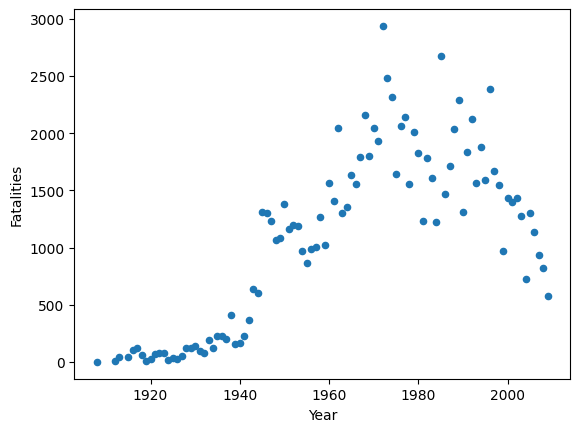

In [54]:
yearly_fatalities = airplane_df2.groupby(['Year'])['Fatalities'].sum().reset_index()
yearly_fatalities.corr()
yearly_fatalities.plot.scatter(x='Year', y='Fatalities')

This plot was set to see if there is any relationship between the year and the number of fatalities recorded. Based on this, it can be assumed that the number of fatalities increased until the 60's before it started to drop again. It can also be noticed that a drastic drop of the number of fatalities started during the 2000's.

*b. What is the average fatalities per decade?*

In [55]:
decade_list = []
for i in range(len(airplane_df.index)):
    decade = int(np.floor(airplane_df2.iloc[i]['Year']/10)*10) # get decade
    decade_list.append(decade)

airplane_df2 = airplane_df2.assign(Decade=decade_list)

decade_fatalities = airplane_df2.groupby(['Decade'])['Fatalities'].mean()
decade_fatalities.round(2)

Decade
1900     1.00
1910    15.08
1920     3.56
1930     5.78
1940    15.93
1950    18.56
1960    23.05
1970    25.24
1980    24.91
1990    21.78
2000    18.97
Name: Fatalities, dtype: float64

- Is there a relationship between the decade that the crash happened and the number of fatalities?

<AxesSubplot: xlabel='Decade'>

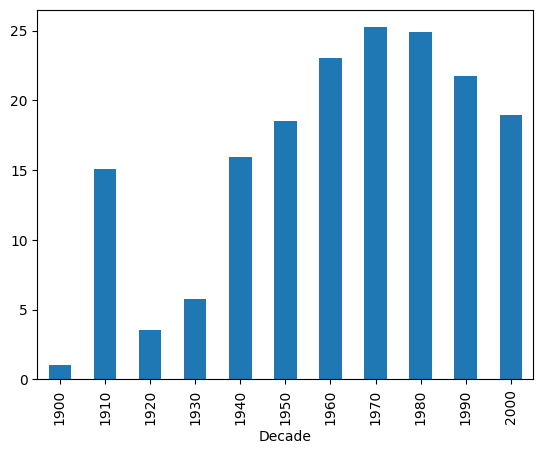

In [56]:
decade_fatalities.plot.bar(x='Decade', y='Fatalities')

There is a sudden jump of fatalities during the second decade. A possible cause for this is because air transportation has just been discovered, a lot of people were trying to innovate and build new machinery which would unfortunately fail. The number of fatalities drastically increased from the 30's to the 60's before it starts a downward trend. This may be due to the sudden rise in demand of air transportation. It was only during the recent years where the development for air transportation safety has picked up pace.

**2. What is the country with the most airplane crashes?**

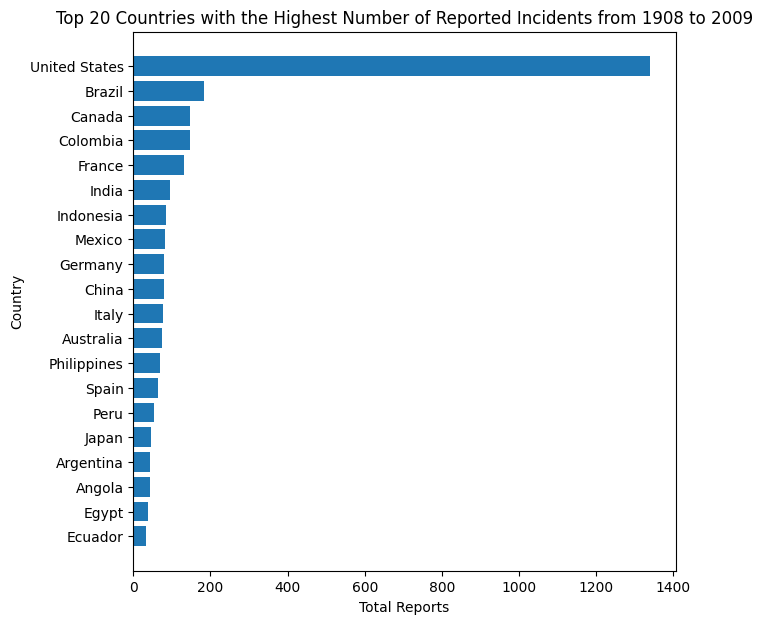

In [67]:
df = airplane_df.copy()

US_states = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

# Cleaning
df = df[df["Fatalities"].notna()]
df = df[df["Type"].notna()]
df = df[df["Location"].notna()]
df = df.reset_index(drop=True)

# Get Location Column
locations = df['Location'].apply(str)

#Get Fatalities Column
fatalities = df['Fatalities']

for loc in locations:
    # Divide string by comma
    split = loc.split(',') 

    # Get Last String and remove any excess spaces
    country = split[-1] if split[-1][0] != ' ' else split[-1][1:]

    if(loc not in countries):
        
    # Replace location with the country string
        if(country in countries):
            df['Location'] = df['Location'].replace(loc, country)

    # Replace any US State with the country of United States
        elif(country in US_states):
            df['Location'] = df['Location'].replace(loc, 'United States')

    # Drop rows with uncertain countries
        else:
            df.drop(df[df['Location'] == loc].index, inplace=True)


country_count = df.groupby(['Location'])['Location'].count().reset_index(name='Number of Reports')
country_count = country_count.sort_values(by=['Number of Reports'], ascending=False)

top_20 = country_count.head(20)

fig = plt.figure(figsize=(7,7))
plt.barh(top_20['Location'], top_20['Number of Reports'])
plt.gca().invert_yaxis()
plt.xlabel("Total Reports")
plt.ylabel("Country")
plt.title("Top 20 Countries with the Highest Number of Reported Incidents from 1908 to 2009")
plt.show()

After configuring each location to their respective country, each record on the data frame was summed per country. The sum of the top 20 highest total count is shown the by figure above. Amongst all the countries, the United States stands with the highest number of reports, followed by Brazil, Canada, Colombia, and France respectively.

*b. What is the country with the most aircraft related fatalities*

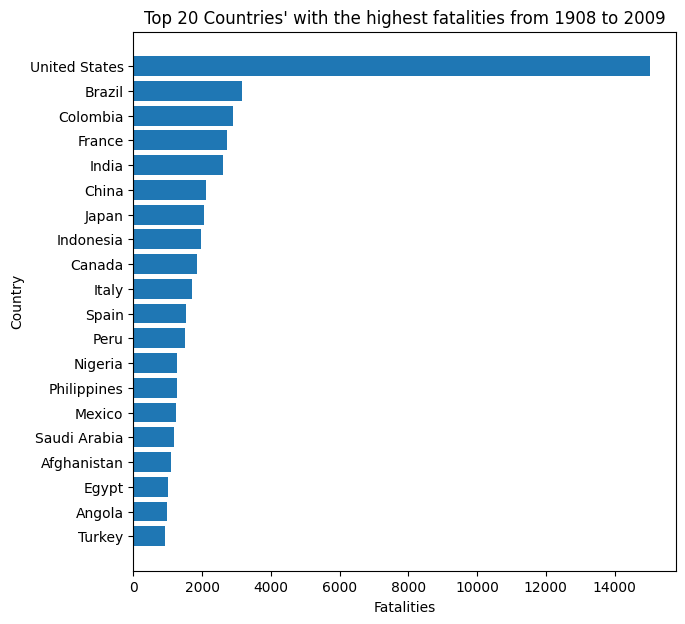

In [68]:
country_fatalities = df.groupby(['Location'])['Fatalities'].sum().reset_index(name='Total Fatalities')
country_fatalities = country_fatalities.sort_values(by=['Total Fatalities'], ascending=False)
top_20 = country_fatalities.head(20)

fig = plt.figure(figsize=(7,7))
plt.barh(top_20['Location'], top_20['Total Fatalities'])
plt.gca().invert_yaxis()
plt.xlabel("Fatalities")
plt.ylabel("Country")
plt.title("Top 20 Countries' with the highest fatalities from 1908 to 2009")
plt.show()

Similar to the previous figure, each record was grouped by their respective country and instead of summing their count, their fatalities were summed. The figure above shows the top 20 countries with the highest number of fatalities. Amongst all the countries, the United States stands with the highest total fatalities, followed by Brazil, Colombia, France, and India respectively.

**3. What are the common causes of plane crashes?**

In [59]:
#code here
# keywords: Thunderstorm, Engine failure, shut down, exploded, pilot error, mechanical, etc.

# Research Question
Come up with one (1) research question to answer using the dataset. Here are some
requirements:

* The research question should arise from the exploratory data analysis. There should be an explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis.
* The research question should be within the scope of the dataset.
* The research question should be answerable by either performing data mining techniques or any domain-specific data modelling technique (i.e., techniques in modelling text, timeseries, graph, or image data) taught in class.
* Make sure to indicate the importance and significance of the research question